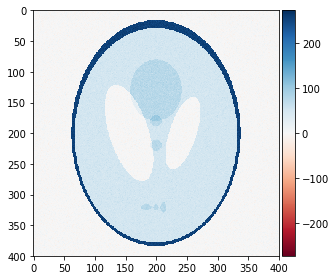

In [78]:
import skimage as sk 
import os
import matplotlib.pyplot as plt
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage import io
from skimage.util import random_noise

I = img_as_ubyte(io.imread(os.path.join(data_dir, "phantom.png"),
                                      as_gray=True))

# Add gaussian noise with mean 0 and variance sigma: 
sigma = 5
In = I + sigma*np.random.normal(0, 1, (I.shape[0],I.shape[1]))

sk.io.imshow(In)

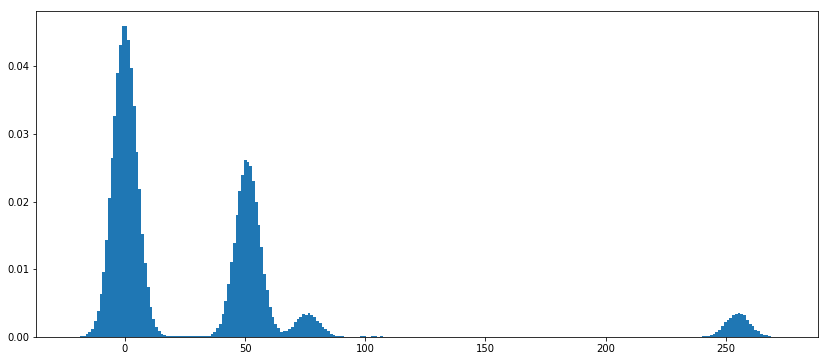

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# reshape training image as 1d array:
v_I = In.reshape(In.shape[0]*In.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v_I,bins=256,density=True)
plt.show()

In [80]:
np.unique(v_I)

array([-22.04989143, -21.44593186, -21.00717838, ..., 272.53775782,
       273.10642232, 273.40693499])

# Kmeans clustering 

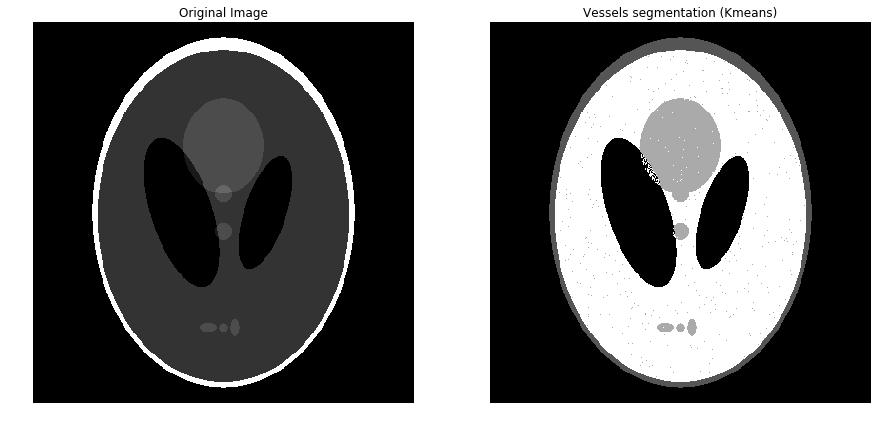

In [73]:
from sklearn.cluster import KMeans


# Fit a Kmeans clustering model with two clusters using training image:
kmeans = KMeans(n_clusters=4, random_state=0).fit(v_I)

# Apply to predict test image:

v_kmeans = kmeans.predict(v_I)
I_kmeans = np.array(v_kmeans).reshape(I.shape[0],I.shape[1]).astype(np.uint8)# Shape back result as image 


fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Vessels segmentation (Kmeans)')
ax2.set_axis_off()

plt.show()

In [61]:
kmeans.cluster_centers_

array([[2.81943358e-11],
       [2.55000000e+02],
       [5.10000000e+01],
       [7.60000000e+01],
       [2.50000000e+01],
       [1.02000000e+02]])

In [58]:
v_kmeans = kmeans.predict(v_I)
np.unique(v_kmeans)

array([0, 1, 2, 3, 4, 5], dtype=int32)

# GMM model selection for segmentation:

In [84]:
from skimage import io, exposure  
from sklearn.cluster import KMeans, AgglomerativeClustering
from skimage.measure import label
from skimage.transform import resize
from skimage.color import label2rgb, rgb2gray
import numpy as np
import skimage as sk 
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn import mixture

#calcula el BIC per trobar el número de gaussianes òptim
NMAX = 10
bic = []
aic = []

for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG).fit(v_I)
    bic.append(gmm.bic(v_I)) #cada cop va afegint el bic amb kG+1, així ho tens tot en un vector i pots calcualr el mínim

print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))

[1734976.6888768745, 1510071.1967881988, 1312261.2864842152, 1280386.0073726804, 1281269.814872772, 1281755.4645936717, 1281841.5956861018, 1281774.4036139783, 1281841.7233217317, 1280814.0070777624]
...and the winner is GMM model G = 4


In [87]:
gmmw = mixture.GaussianMixture(n_components=idx_winner).fit(v_I)
v_agg = gmmw.fit_predict(v_I)
I_gmm = np.array(v_agg).reshape(I.shape[0],I.shape[1])# Shape back result as image

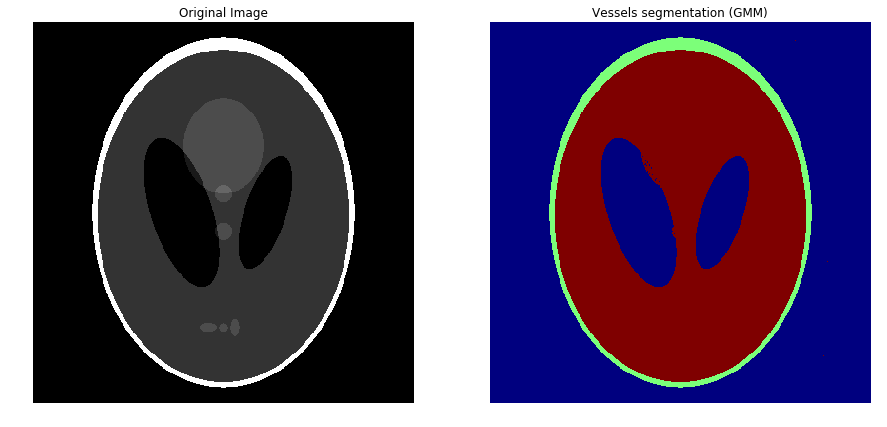

In [89]:
fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_gmm, cmap=plt.cm.jet)
ax2.set_title('Vessels segmentation (GMM)')
ax2.set_axis_off()

plt.show()